In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Set global parameters
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

In [49]:
# from google.colab import drive
# drive.mount('/content/drive')

In [51]:
df = pd.read_csv("assets/dc dataset final.csv")
df.head()

,Date,Adj Close Chevron stock,Adj Close Exxonmobil stock,Price S&P Oil,Price treasury,Price WTI crude oil,Unnamed: 6,Unnamed: 7
0,26-03-2014,78.867645,62.598408,"10,876.50",2.694,100.23,NaN,NaN
1,27-03-2014,78.840851,63.616409,"10,896.20",2.683,101.28,NaN,NaN
2,28-03-2014,79.396973,64.581490,"10,959.70",2.723,101.60,NaN,NaN
3,31-03-2014,79.671669,64.568283,"11,103.20",2.719,101.57,NaN,NaN
4,01-04-2014,79.731964,64.601311,"11,153.90",2.755,99.69,NaN,NaN


In [53]:
df.columns

Index(['Date', 'Adj Close Chevron stock', 'Adj Close Exxonmobil stock',
       'Price S&P Oil', 'Price treasury', 'Price WTI crude oil', 'Unnamed: 6',
       'Unnamed: 7'],
      dtype='object')

In [55]:
df = df.drop("Unnamed: 7",axis=1)
df = df.drop("Unnamed: 6",axis=1)
df.head()

,Date,Adj Close Chevron stock,Adj Close Exxonmobil stock,Price S&P Oil,Price treasury,Price WTI crude oil
0,26-03-2014,78.867645,62.598408,"10,876.50",2.694,100.23
1,27-03-2014,78.840851,63.616409,"10,896.20",2.683,101.28
2,28-03-2014,79.396973,64.581490,"10,959.70",2.723,101.60
3,31-03-2014,79.671669,64.568283,"11,103.20",2.719,101.57
4,01-04-2014,79.731964,64.601311,"11,153.90",2.755,99.69


In [57]:
df["Date"] = pd.to_datetime(df["Date"], format='%d-%m-%Y', errors='coerce')
df.head()

,Date,Adj Close Chevron stock,Adj Close Exxonmobil stock,Price S&P Oil,Price treasury,Price WTI crude oil
0,2014-03-26,78.867645,62.598408,"10,876.50",2.694,100.23
1,2014-03-27,78.840851,63.616409,"10,896.20",2.683,101.28
2,2014-03-28,79.396973,64.581490,"10,959.70",2.723,101.60
3,2014-03-31,79.671669,64.568283,"11,103.20",2.719,101.57
4,2014-04-01,79.731964,64.601311,"11,153.90",2.755,99.69


In [59]:
df.tail()

,Date,Adj Close Chevron stock,Adj Close Exxonmobil stock,Price S&P Oil,Price treasury,Price WTI crude oil
1254,2019-03-20,102.136162,64.249138,"4,797.00",2.668,58.26
1255,2019-03-21,103.094521,64.620468,"4,578.70",2.698,58.61
1256,2019-03-22,100.825546,63.585484,"4,581.00",2.730,58.52
1257,NaT,NaN,NaN,NaN,NaN,NaN
1258,NaT,NaN,NaN,NaN,NaN,NaN


In [61]:
## Remove the last two 'NaN' rows
df = df.drop([1257, 1258])
df.tail()

,Date,Adj Close Chevron stock,Adj Close Exxonmobil stock,Price S&P Oil,Price treasury,Price WTI crude oil
1252,2019-03-18,103.110886,64.059532,"4,599.00",2.633,56.07
1253,2019-03-19,102.619423,63.893593,"4,731.60",2.552,56.87
1254,2019-03-20,102.136162,64.249138,"4,797.00",2.668,58.26
1255,2019-03-21,103.094521,64.620468,"4,578.70",2.698,58.61
1256,2019-03-22,100.825546,63.585484,"4,581.00",2.730,58.52


In [63]:
print(min(df["Adj Close Chevron stock"]))
print(max(df["Adj Close Chevron stock"]))

49.736332
104.320641


In [65]:
print(min(df["Adj Close Exxonmobil stock"]))
print(max(df["Adj Close Exxonmobil stock"]))

47.554298
69.465523


In [67]:
print(min(df["Price treasury"]))
print(max(df["Price treasury"]))

1.358
3.239


In [69]:
print(min(df["Price WTI crude oil"]))
print(max(df["Price WTI crude oil"]))

26.2
107.3


In [71]:
df["Date"].dtype

dtype('<M8[ns]')

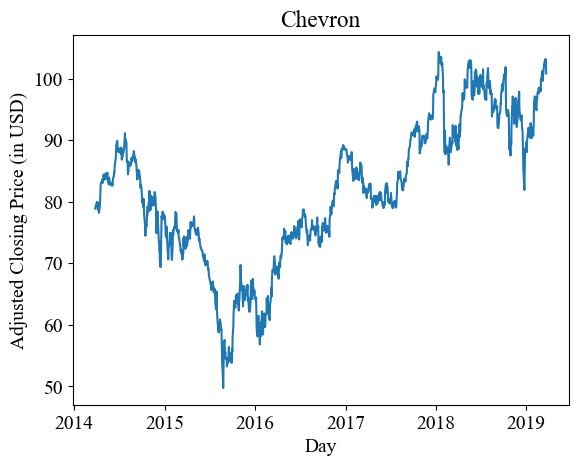

In [73]:
plt.plot(df["Date"], df["Adj Close Chevron stock"])
plt.xlabel("Day")
plt.ylabel("Adjusted Closing Price (in USD)")
plt.title("Chevron")
plt.show()

In [75]:
df["Price S&P Oil"] = pd.to_numeric(df["Price S&P Oil"].str.replace(',', ''), errors='coerce')
# df["Price S&P Oil"] = df["Price S&P Oil"].astype(str)
# df["Price S&P Oil"] = df["Price S&P Oil"].str.replace(",", "")
# df["Price S&P Oil"] = df["Price S&P Oil"].astype(float)
print(min(df["Price S&P Oil"]))
print(max(df["Price S&P Oil"]))

3582.7
12669.7


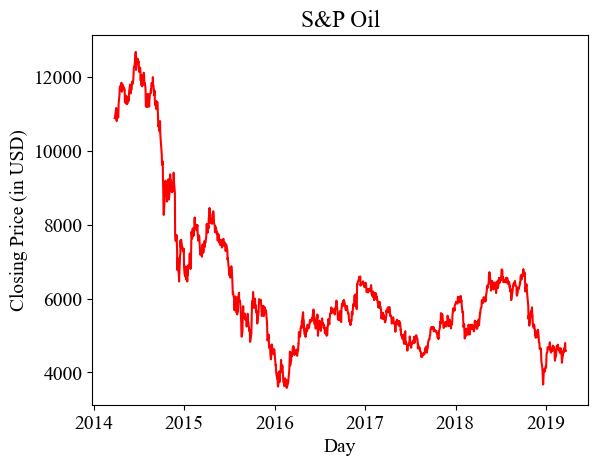

In [77]:
plt.plot(df["Date"], df["Price S&P Oil"], label='S&P Oil', color='red')
plt.xlabel("Day")
plt.ylabel("Closing Price (in USD)")
plt.title("S&P Oil")
plt.show()

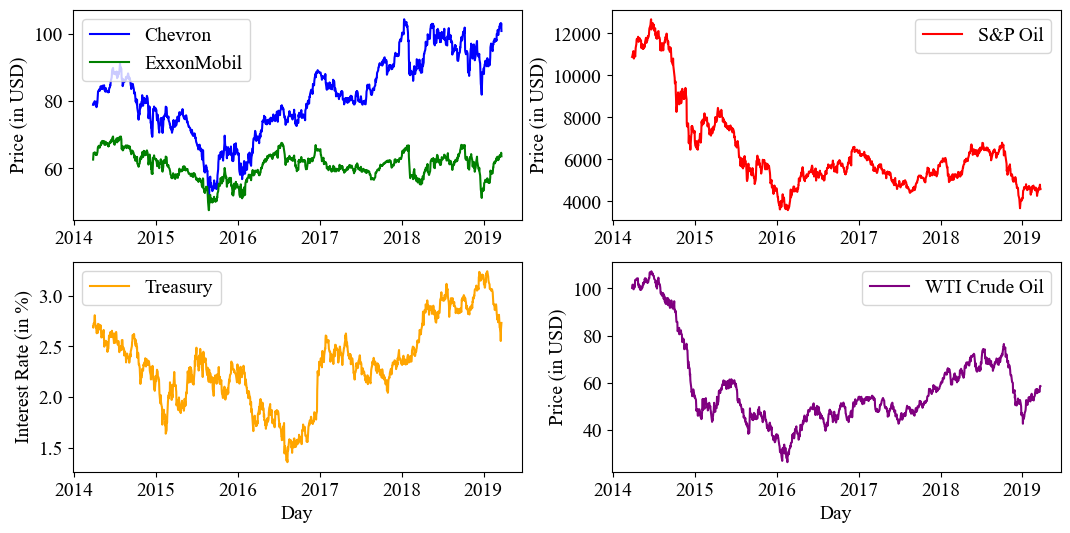

In [93]:
plt.figure(figsize=(12.75, 6))

plt.subplot(2, 2, 1)
plt.plot(df["Date"], df["Adj Close Chevron stock"], label='Chevron', color='blue')
plt.plot(df["Date"], df["Adj Close Exxonmobil stock"], label='ExxonMobil', color='green')
plt.ylabel("Price (in USD)")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(df["Date"], df["Price S&P Oil"], label='S&P Oil', color='red')
plt.ylabel("Price (in USD)")
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(df["Date"], df["Price treasury"], label='Treasury', color='orange')
plt.ylabel("Interest Rate (in %)")
plt.xlabel("Day")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(df["Date"], df["Price WTI crude oil"], label='WTI Crude Oil', color='purple')
plt.xlabel("Day")
plt.ylabel("Price (in USD)")
plt.legend()

plt.savefig('assets/wholeData.png')
plt.show()

In [95]:
# plt.figure(figsize=(12, 6))

# plt.plot(df["Date"], df["Adj Close Chevron stock"], label='Chevron', color='blue')

# plt.plot(df["Date"], df["Adj Close Exxommobil stock"], label='ExxonMobil', color='green')

# plt.plot(df["Date"], df["Price S&P Oil"], label='S&P Oil', color='red')

# plt.plot(df["Date"], df["Price treasury"], label='Treasury', color='orange')

# plt.plot(df["Date"], df["Price WTI crude oil"], label='WTI Crude Oil', color='purple')

# plt.xlabel("Date")
# plt.ylabel("Price")
# plt.title("Stock and Oil Prices Over Time")
# plt.legend()
# plt.show()

In [97]:
from sklearn.preprocessing import StandardScaler

columns_to_normalize = df.columns[1:]

## Moved to an earlier cell
# df["Price S&P Oil"] = pd.to_numeric(df["Price S&P Oil"].str.replace(',', ''), errors='coerce')

## Perform zero mean and unit variance normalization.
## Ref1: https://www.geeksforgeeks.org/what-is-zero-mean-and-unit-variance-normalization/
## Ref2: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.fit_transform
scaler = StandardScaler()
for column in columns_to_normalize:
    df[column] = scaler.fit_transform(df[[column]])

In [99]:
df.head()

,Date,Adj Close Chevron stock,Adj Close Exxonmobil stock,Price S&P Oil,Price treasury,Price WTI crude oil
0,2014-03-26,-0.229418,0.467524,2.155907,0.895331,2.360919
1,2014-03-27,-0.231706,0.727092,2.165416,0.868502,2.419916
2,2014-03-28,-0.184200,0.973167,2.196066,0.966062,2.437897
3,2014-03-31,-0.160734,0.969800,2.265329,0.956306,2.436211
4,2014-04-01,-0.155583,0.978221,2.289801,1.044110,2.330577


In [101]:
print(min(df["Adj Close Chevron stock"]))
print(max(df["Adj Close Chevron stock"]))

-2.7179575440141117
1.9449023946265356


In [103]:
print(min(df["Adj Close Exxonmobil stock"]))
print(max(df["Adj Close Exxonmobil stock"]))

-3.3684016266929513
2.2184906370812825


In [105]:
print(min(df["Price S&P Oil"]))
print(max(df["Price S&P Oil"]))

-1.364633039089244
3.0214409631262247


In [107]:
print(min(df["Price treasury"]))
print(max(df["Price treasury"]))

-2.36317439876108
2.224585991605352


In [109]:
print(min(df["Price WTI crude oil"]))
print(max(df["Price WTI crude oil"]))

-1.7986955045732589
2.758169575062348


In [111]:
# df.tail()

In [113]:
# df = df.drop(df.tail(3).index)
# df = df.drop(df.tail(2).index)
# len(df)

In [115]:
# df.tail()

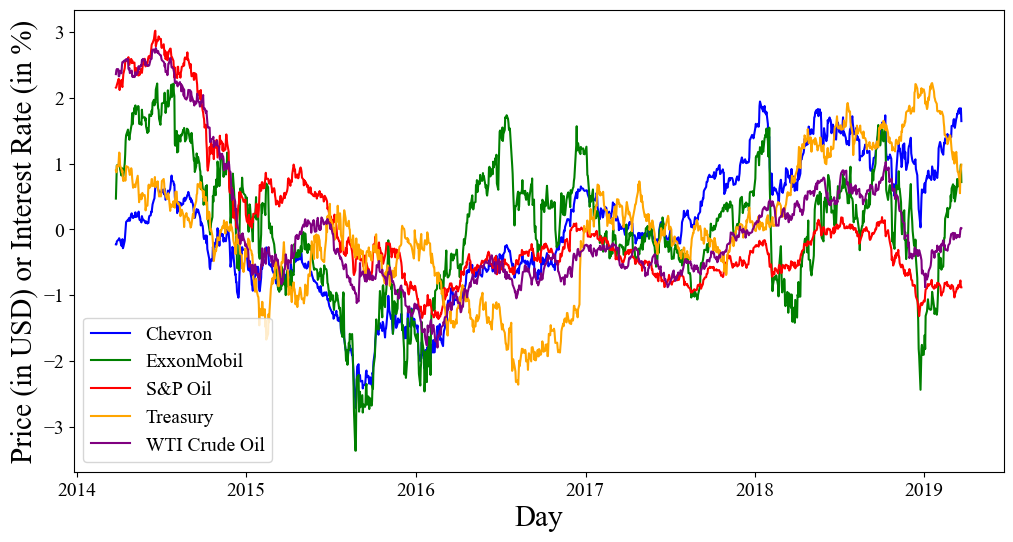

In [133]:
plt.figure(figsize=(12, 6))

plt.plot(df["Date"], df["Adj Close Chevron stock"], label='Chevron', color='blue')

plt.plot(df["Date"], df["Adj Close Exxonmobil stock"], label='ExxonMobil', color='green')

plt.plot(df["Date"], df["Price S&P Oil"], label='S&P Oil', color='red')

plt.plot(df["Date"], df["Price treasury"], label='Treasury', color='orange')

plt.plot(df["Date"], df["Price WTI crude oil"], label='WTI Crude Oil', color='purple')

plt.xlabel("Day", fontsize=21)
plt.ylabel("Price (in USD) or Interest Rate (in %)", fontsize=21)
# plt.title("Stock and Oil Prices Over Time")
plt.legend()
plt.savefig('assets/normalizedData.png')
plt.show()

In [81]:
missing = df.isnull().any()
print(missing)
## There are no missing values

Date                          False
Adj Close Chevron stock       False
Adj Close Exxonmobil stock    False
Price S&P Oil                 False
Price treasury                False
Price WTI crude oil           False
dtype: bool


#Discretizing the dataset

In [119]:
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.impute import SimpleImputer

features_to_discretize = ['Adj Close Chevron stock', 'Adj Close Exxonmobil stock', 'Price S&P Oil', 'Price treasury', 'Price WTI crude oil']

## Discretize each feature into five discrete levels [0, 4].
## The intention for using five discrete levels is to capture the following states:
## 0 = Significantly undervalued
## 1 = Slightly undervalued
## 2 = True value range of the stock
## 3 = Slightly overvalued
## 4 = Significantly overvalued 
##
num_bins = 5

## Preserve the original dataframe and create a copy
df_discretized = df.copy()

for feature in features_to_discretize:

    ## Create a column vector containing the values of the current feature
    data = df[feature].values.reshape(-1,1)

    ## Since, there are no missing values, this imputation step might not be required.
    ##
    ## Fill in the missing values by replacing them with the arithmetic mean of the column vector.
    ## Ref1: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
    ## Ref2: https://www.analyticsvidhya.com/blog/2022/10/handling-missing-data-with-simpleimputer/
    imputer = SimpleImputer(strategy='mean')
    df[feature] = imputer.fit_transform(df[[feature]])

    ## Distribute the values uniformly into five discrete levels i.e. each level will have equal number of values.
    ## The discrete levels are represented by ordinal numbers. 
    ## Ref: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html
    kbins_discretizer = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='uniform')
    df_discretized[f'{feature}_discretized'] = kbins_discretizer.fit_transform(data)

In [121]:
## At this point, 'df' has the original columns followed by the discretized colums
df_discretized.head()

,Date,Adj Close Chevron stock,Adj Close Exxonmobil stock,Price S&P Oil,Price treasury,Price WTI crude oil,Adj Close Chevron stock_discretized,Adj Close Exxonmobil stock_discretized,Price S&P Oil_discretized,Price treasury_discretized,Price WTI crude oil_discretized
0,2014-03-26,-0.229418,0.467524,2.155907,0.895331,2.360919,2.0,3.0,4.0,3.0,4.0
1,2014-03-27,-0.231706,0.727092,2.165416,0.868502,2.419916,2.0,3.0,4.0,3.0,4.0
2,2014-03-28,-0.184200,0.973167,2.196066,0.966062,2.437897,2.0,3.0,4.0,3.0,4.0
3,2014-03-31,-0.160734,0.969800,2.265329,0.956306,2.436211,2.0,3.0,4.0,3.0,4.0
4,2014-04-01,-0.155583,0.978221,2.289801,1.044110,2.330577,2.0,3.0,4.0,3.0,4.0


In [123]:
## Drop the original columns and retain only the discretized columns
for feature in features_to_discretize:
    df_discretized.drop(f"{feature}", axis=1, inplace=True)

df_discretized.head()

,Date,Adj Close Chevron stock_discretized,Adj Close Exxonmobil stock_discretized,Price S&P Oil_discretized,Price treasury_discretized,Price WTI crude oil_discretized
0,2014-03-26,2.0,3.0,4.0,3.0,4.0
1,2014-03-27,2.0,3.0,4.0,3.0,4.0
2,2014-03-28,2.0,3.0,4.0,3.0,4.0
3,2014-03-31,2.0,3.0,4.0,3.0,4.0
4,2014-04-01,2.0,3.0,4.0,3.0,4.0


In [125]:
print(min(df_discretized["Adj Close Chevron stock_discretized"]))
print(max(df_discretized["Adj Close Chevron stock_discretized"]))

0.0
4.0


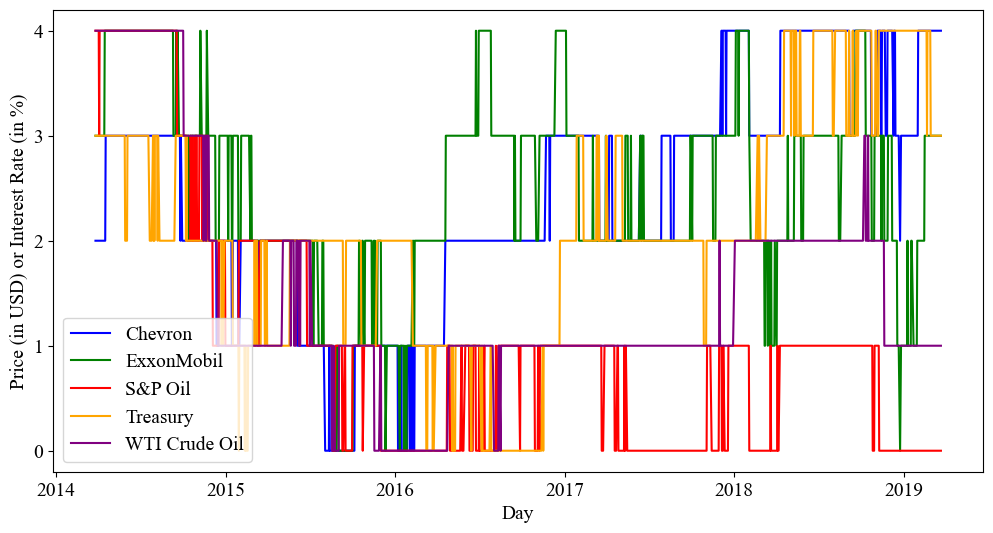

In [127]:
plt.figure(figsize=(12, 6))

plt.plot(df_discretized["Date"], df_discretized["Adj Close Chevron stock_discretized"], label='Chevron', color='blue')

plt.plot(df_discretized["Date"], df_discretized["Adj Close Exxonmobil stock_discretized"], label='ExxonMobil', color='green')

plt.plot(df_discretized["Date"], df_discretized["Price S&P Oil_discretized"], label='S&P Oil', color='red')

plt.plot(df_discretized["Date"], df_discretized["Price treasury_discretized"], label='Treasury', color='orange')

plt.plot(df_discretized["Date"], df_discretized["Price WTI crude oil_discretized"], label='WTI Crude Oil', color='purple')

plt.yticks(np.arange(0, 5, 1))
plt.xlabel("Day")
plt.ylabel("Price (in USD) or Interest Rate (in %)")
# plt.title("Stock and Oil Prices Over Time")
plt.legend()
# plt.savefig('normalizedData.jpg')
plt.show()

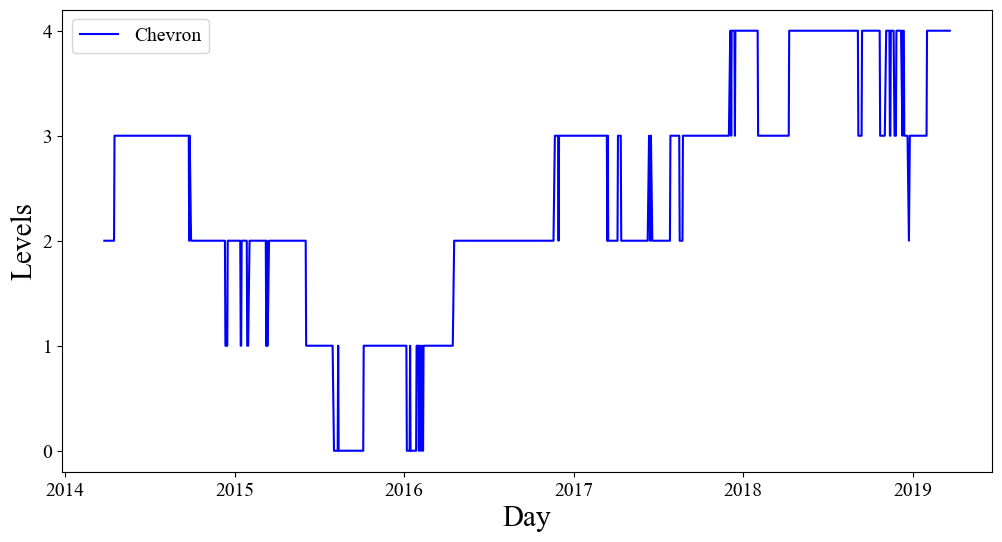

In [135]:
plt.figure(figsize=(12, 6))

plt.plot(df_discretized["Date"], df_discretized["Adj Close Chevron stock_discretized"], label='Chevron', color='blue')

# plt.plot(df_discretized["Date"], df_discretized["Adj Close Exxonmobil stock_discretized"], label='ExxonMobil', color='green')

# plt.plot(df_discretized["Date"], df_discretized["Price S&P Oil_discretized"], label='S&P Oil', color='red')

# plt.plot(df_discretized["Date"], df_discretized["Price treasury_discretized"], label='Treasury', color='orange')

# plt.plot(df_discretized["Date"], df_discretized["Price WTI crude oil_discretized"], label='WTI Crude Oil', color='purple')

plt.yticks(np.arange(0, 5, 1))
plt.xlabel("Day", fontsize=21)
plt.ylabel("Levels", fontsize=21)
# plt.title("Stock and Oil Prices Over Time")
plt.legend()
plt.savefig('assets/discrDataChevron.png')
plt.show()

## Getting a DAG b/w the features vertices using 'pgmpy'

In [63]:
pip install pgmpy


Note: you may need to restart the kernel to use updated packages.


In [67]:
# from pgmpy.models import BayesianModel
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.estimators import HillClimbSearch
import pandas as pd


df_discretized = df_discretized.drop(columns=['Date'])

target_variable = 'Adj Close Chevron stock_discretized'

# model = BayesianModel()
model = DiscreteBayesianNetwork()

for feature in df_discretized.columns:
    if feature != target_variable:
        model.add_edge(feature, target_variable)

## Find a structure with the 'maximum' BIC score using
## hill climb search. The 'maximum' may not be a global
## maximum, it might be a local maximum. Hence, it is 
## an approximate search.
data = df_discretized.copy()
hc = HillClimbSearch(data)
best_model = hc.estimate()

edges = best_model.edges()

for edge in edges:
    print(f"{edge[0]} -> {edge[1]}")    

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Adj Close Chevron stock_discretized': 'N', 'Adj Close Exxonmobil stock_discretized': 'N', 'Price S&P Oil_discretized': 'N', 'Price treasury_discretized': 'N', 'Price WTI crude oil_discretized': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Adj Close Chevron stock_discretized': 'N', 'Adj Close Exxonmobil stock_discretized': 'N', 'Price S&P Oil_discretized': 'N', 'Price treasury_discretized': 'N', 'Price WTI crude oil_discretized': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Adj Close Chevron stock_discretized': 'N', 'Adj Close Exxonmobil stock_discretized': 'N', 'Price S&P Oil_discretized': 'N', 'Price treasury_discretized': 'N', 'Price WTI crude oil_discretized': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

Adj Close Chevron stock_discretized -> Adj Close Exxonmobil stock_discretized
Price S&P Oil_discretized -> Price WTI crude oil_discretized
Price treasury_discretized -> Adj Close Chevron stock_discretized
Price WTI crude oil_discretized -> Price treasury_discretized
Price WTI crude oil_discretized -> Adj Close Chevron stock_discretized


In [174]:
from pgmpy.estimators import MaximumLikelihoodEstimator

out_model = DiscreteBayesianNetwork()

for edge in edges:
    out_model.add_edge(edge[0], edge[1])

mlEstimator = MaximumLikelihoodEstimator(out_model, data)

# Estimate the CPD for variable 'C'
cpds = mlEstimator.estimate_cpd('Adj Close Chevron stock_discretized')
print(cpds) ## Not sure how to interpret

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Adj Close Chevron stock_discretized': 'N', 'Adj Close Exxonmobil stock_discretized': 'N', 'Price S&P Oil_discretized': 'N', 'Price treasury_discretized': 'N', 'Price WTI crude oil_discretized': 'N'}


+------------------------------------------+-----+--------------------------------------+
| Price WTI crude oil_discretized          | ... | Price WTI crude oil_discretized(4.0) |
+------------------------------------------+-----+--------------------------------------+
| Price treasury_discretized               | ... | Price treasury_discretized(4.0)      |
+------------------------------------------+-----+--------------------------------------+
| Adj Close Chevron stock_discretized(0.0) | ... | 0.2                                  |
+------------------------------------------+-----+--------------------------------------+
| Adj Close Chevron stock_discretized(1.0) | ... | 0.2                                  |
+------------------------------------------+-----+--------------------------------------+
| Adj Close Chevron stock_discretized(2.0) | ... | 0.2                                  |
+------------------------------------------+-----+--------------------------------------+
| Adj Clos

# Older: As we can see that `WTI crude oil_discretized` and  `S&P Oil_discretized` affect our target directly therfore we will consider both as the parents of Chevron Stock
# As we can see that `Price treasury_discretized` and  `Price WTI crude oil_discretized` affect our target directly therfore we will consider both as the parents of Chevron Stock

Selecting only the necessary features from our datasets

In [71]:
# selected_columns = ["Date","Price S&P Oil", "Price WTI crude oil", "Adj Close Chevron stock"]
selected_columns = ["Date","Price treasury", "Price WTI crude oil", "Adj Close Chevron stock"]
df_selected = df.loc[:, selected_columns]
df_selected.index = df_selected.pop("Date")
df_selected

,Price treasury,Price WTI crude oil,Adj Close Chevron stock
Date,,,
2014-03-26,0.895331,2.360919,-0.229418
2014-03-27,0.868502,2.419916,-0.231706
2014-03-28,0.966062,2.437897,-0.184200
2014-03-31,0.956306,2.436211,-0.160734
2014-04-01,1.044110,2.330577,-0.155583
...,...,...,...
2019-03-18,0.746552,-0.120353,1.841559
2019-03-19,0.548992,-0.075403,1.799576
2019-03-20,0.831917,0.002699,1.758293


In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Remove the column corr. to the target variable from the dataframe
X = df_selected.drop("Adj Close Chevron stock", axis=1)

## The values of the target variable
y = df_selected["Adj Close Chevron stock"]

## Split the dataframe into train and test sets.
## The test set should contain 20% of the randomly selected rows and the training set should contain the
## remaining 80% of the rows. 
## The input parameter 'random_state' is used to make the result reproducible.
## Ref1: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
## Ref2: https://www.geeksforgeeks.org/how-to-split-the-dataset-with-scikit-learns-train_test_split-function/
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Initialize a random forest regressor with 100 decision trees (default).
## The input parameter 'random_state' is used to make the result reproducible.
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

## Fit the regressor to the train set i.e.
## train the regressor
rf_regressor.fit(X_train, y_train)

## Use the trained regressor to perform prediction in the test set
y_pred = rf_regressor.predict(X_test)

## Compute r-squared
## Ref1: https://en.wikipedia.org/wiki/Coefficient_of_determination
## Ref2: https://www.investopedia.com/terms/r/r-squared.asp
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

## Compute mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

R^2 Score: 0.7472943810312044
Mean Squared Error: 0.2601408812485171


In [127]:
rf_regressor

NameError: name 'rf_regressor' is not defined

# Auto Regression


In [79]:
pip install --upgrade keras

   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ------------------------------- -------- 1.0/1.3 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 5.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# USING LSTM Model on our Chevron Dataset

In [5]:
pip install tensorflow

   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/376.0 MB ? eta -:--:--
   ---------------------------------------- 2.1/376.0 MB 6.5 MB/s eta 0:00:58
   ---------------------------------------- 4.5/376.0 MB 8.4 MB/s eta 0:00:45
    --------------------------------------- 6.8/376.0 MB 9.3 MB/s eta 0:00:40
    --------------------------------------- 9.2/376.0 MB 9.8 MB/s eta 0:00:38
   - -------------------------------------- 12.1/376.0 MB 10.2 MB/s eta 0:00:36
   - -------------------------------------- 14.4/376.0 MB 10.3 MB/s eta 0:00:36
   - -------------------------------------- 16.8/376.0 MB 10.5 MB/s eta 0:00:35
   -- ------------------------------------- 19.1/376.0 MB 10.6 MB/s eta 0:00:34
   -- ------------------------------------- 21.8/376.0 MB 10.7 MB/s eta 0:00:34
   -- ------------------------------------- 23.6/376.0 MB 10.5 MB/s eta 0:00:34
   -- ------------------------------------- 26.2/376.0 MB 10.9 MB/

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense

data = pd.read_csv("assets/dc dataset final.csv")
data = data[["Date", "Adj Close Chevron stock"]]

data["Date"] = pd.to_datetime(data["Date"], format='%d-%m-%Y', errors='coerce')
data.set_index('Date', inplace=True)

data = data.drop(data.tail(2).index)
data.tail()


# df.head()
# df.tail()

# data = pd.read_csv('/content/drive/MyDrive/Stock Price Data/CVX.csv')
# data = data[['Date', 'Adj Close']]


# data['Date'] = pd.to_datetime(data['Date'])
# data.set_index('Date', inplace=True)


,Adj Close Chevron stock
Date,
2019-03-18,103.110886
2019-03-19,102.619423
2019-03-20,102.136162
2019-03-21,103.094521
2019-03-22,100.825546


In [3]:
len(data)

1257

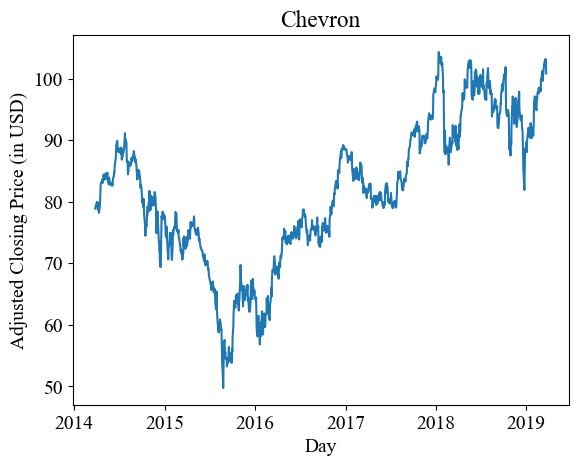

In [23]:
import matplotlib.pyplot as plt

## Set global parameters
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

plt.plot(data.index, data["Adj Close Chevron stock"])
plt.xlabel("Day")
plt.ylabel("Adjusted Closing Price (in USD)")
plt.title("Chevron")
plt.savefig('assets/ChevronLSTM.png')
plt.show()

In [154]:
## A step-by-step tutorial on LSTM:
## https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
##

## Fix random seed for reproducibility
## Ref: https://keras.io/examples/keras_recipes/reproducibility_recipes/
keras.utils.set_random_seed(42)

time_steps = 8

# Create sequences of data for training
sequences = []
targets = []
for i in range(len(data) - time_steps):
    seq = data['Adj Close Chevron stock'].values[i:i+time_steps]
    label = data['Adj Close Chevron stock'].values[i+time_steps]
    sequences.append(seq)
    targets.append(label)

sequences = np.array(sequences)
targets = np.array(targets)

## Scale the data in such a way that
## the values of each feature lies in [0, 1].
## Ref1: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
## Ref2: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
scaler = MinMaxScaler(feature_range=(0, 1))
sequences = scaler.fit_transform(sequences.reshape(-1, 1)).reshape(-1, time_steps, 1)
targets = targets.reshape(-1, 1)
targets = scaler.fit_transform(targets)

## Split the data in such a way that
## the first 80% of the sequences and their corr. target labels make the training data while
## the remaining 20% of the sequences and their corr. target labels make the test data.
split_index = int(0.8 * len(sequences))
X_train, X_test = sequences[:split_index], sequences[split_index:]
y_train, y_test = targets[:split_index], targets[split_index:]

## Initialize a sequential model with an input layer.
## A sequential model is comprised of a stack of layers and
## each layer has exactly one input tensor and one output tensor.
## Additionally, the model itself should have a single tensor as input and
## a single tensor as output.
## Ref: https://keras.io/guides/sequential_model/
model = Sequential()

## Add a hidden LSTM layer with 50 LSTM cells/neurons.
## The shape of the input tensor to this layer should be (time_steps, 1).
model.add(LSTM(units=50, input_shape=(time_steps, 1)))

## Add an output layer with a single neuron
model.add(Dense(units=1))

## Configure the model before training begins.
## Use the 'mean squared error' as the loss function.
## A loss function is used to measure the difference between 
## the actual values and predicted values.
## Ref: 
## Use the 'Adam algorithm' to update the model weights based 
## on the value of the loss function. 
## Ref: https://keras.io/api/optimizers/adam/
model.compile(optimizer='adam', loss='mean_squared_error')

## Train the network for 10 epochs with a batch size of 16
## i.e. 16 (sequence, target) pairs.
## An epoch is an iteration over the entire training data.
## The batch size represents the number of samples to be utilised
## per gradient update.
## Also, point the model to the validation data on which 
## the model will be tested after training.
## Ref: https://keras.io/api/models/model_training_apis/
##
## epochs=1 (default), batch_size=16 => R^2=0.238259760360802
## epochs=2, batch_size=16 => R^2=0.6076768461890216
## epochs=3, batch_size=16 => R^2=0.6393870149147675
## epochs=4, batch_size=16 => R^2=0.6069410377589126
## epochs=5, batch_size=16 => R^2=0.615780247748259
## epochs=6, batch_size=16 => R^2=0.6310904955650742
## epochs=7, batch_size=16 => R^2=0.6442016644213661
## epochs=8, batch_size=16 => R^2=0.6554080630824834
## epochs=8, batch_size=16 => R^2=0.665585936092229
## epochs=10, batch_size=16 => R^2=0.6750613637560314
## epochs=15, batch_size=16 => R^2=0.713152760635588
model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))

## Make predictions on the test data
predictions = model.predict(X_test)

## Compute R-squared 
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test)
r2 = r2_score(y_test, predictions)
print(f'R^2 Score on Test Data: {r2}')

C:\Users\sapta\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/9
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1198 - val_loss: 0.0043
Epoch 2/9
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 3/9
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0014 - val_loss: 0.0020
Epoch 4/9
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0013 - val_loss: 0.0022
Epoch 5/9
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0013 - val_loss: 0.0022
Epoch 6/9
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0013 - val_loss: 0.0021
Epoch 7/9
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0013 - val_loss: 0.0020
Epoch 8/9
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0013 - val_loss: 0.0019
Epoch 9/9
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0012 - val_loss: 0.0019
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
R^2 Score on Test Data: 0.665585936092229


In [184]:
len(sequences)
len(targets)

1249

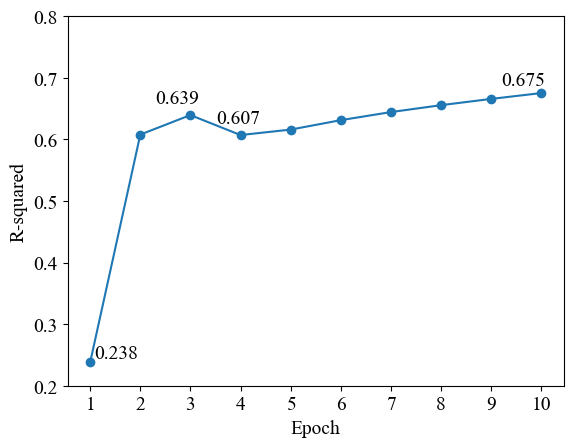

In [45]:
import matplotlib.pyplot as plt
import numpy as np

## Set global parameters
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

xpoints = np.array(range(1, 11))
ypoints = np.array([0.238259760360802, 0.6076768461890216, 0.6393870149147675, 0.6069410377589126, 
                    0.615780247748259, 0.6310904955650742, 0.6442016644213661, 0.6554080630824834, 0.665585936092229, 0.6750613637560314])


plt.plot(xpoints, ypoints, 'o-')
plt.xticks(np.arange(1, 11, 1))
plt.yticks(np.arange(0.2, 0.81, 0.1))
plt.xlabel('Epoch')
plt.ylabel('R-squared')
plt.annotate('0.238', (1, 0.238259760360802), textcoords='offset points', xytext=(3,3), ha='left')
plt.annotate('0.639', (3, 0.6393870149147675), textcoords='offset points', xytext=(6,6), ha='right', va='bottom')
plt.annotate('0.607', (4, 0.6069410377589126), textcoords='offset points', xytext=(14,6), ha='right', va='bottom')
plt.annotate('0.675', (10, 0.6750613637560314), textcoords='offset points', xytext=(3,6), ha='right')
plt.savefig('assets/r2_LSTM.png')
plt.show()

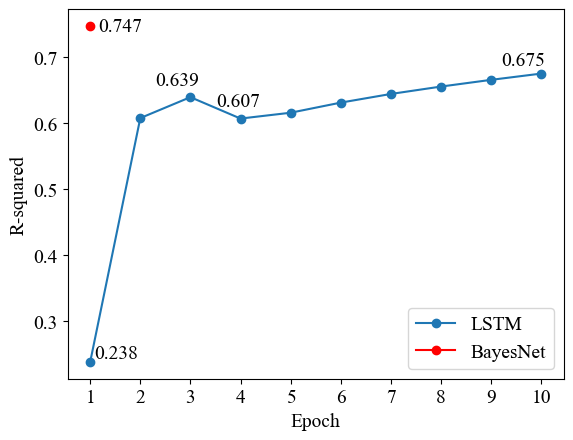

In [43]:
xpoints = np.array(range(1, 11))
ypoints = np.array([0.238259760360802, 0.6076768461890216, 0.6393870149147675, 0.6069410377589126, 
                    0.615780247748259, 0.6310904955650742, 0.6442016644213661, 0.6554080630824834, 0.665585936092229, 0.6750613637560314])

## Set global parameters
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14


plt.plot(xpoints, ypoints, 'o-', label='LSTM')
plt.xticks(np.arange(1, 11, 1))
plt.yticks(np.arange(0.2, 0.81, 0.1))
plt.xlabel('Epoch')
plt.ylabel('R-squared')
plt.annotate('0.238', (1, 0.238259760360802), textcoords='offset points', xytext=(3,3), ha='left')
plt.annotate('0.639', (3, 0.6393870149147675), textcoords='offset points', xytext=(6,6), ha='right', va='bottom')
plt.annotate('0.607', (4, 0.6069410377589126), textcoords='offset points', xytext=(14,6), ha='right', va='bottom')
plt.annotate('0.675', (10, 0.6750613637560314), textcoords='offset points', xytext=(3,6), ha='right')

## Bayesian network
plt.plot(1, 0.7472943810312044, 'o-', color='red', label='BayesNet')
plt.annotate('0.747', (1, 0.7472943810312044), textcoords='offset points', xytext=(6,6), ha='left', va='top')
plt.legend()
plt.savefig('assets/LSTMvsBayesNet.png')
plt.show()